In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
train=pd.read_csv('titanic_train.csv')

In [163]:
len(train)

891

In [164]:
train.isnull

<bound method DataFrame.isnull of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

<AxesSubplot:>

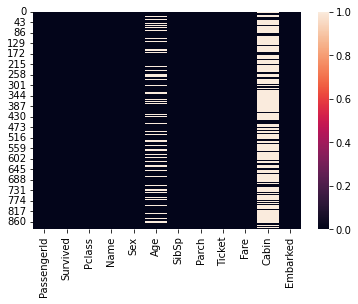

In [165]:
sns.heatmap(train.isnull())

In [166]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

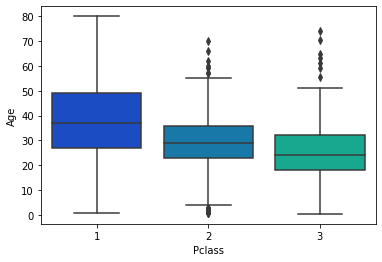

In [167]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [168]:
#def impute_age(cols):
 #   Age = cols[0]
  #  pclass = cols[1]
    
   # if pd.isnull(Age):
        
    #    if pclass ==1:
     #       return 37
      #  elif pclass == 2:
       #     return 29
        
        #else:
         #   return 24
        
    #else:
     #       return Age

In [169]:
train['Age'].fillna(method='ffill')
train['Age']=train['Age'].fillna(method='ffill')

In [170]:
train["Age"].describe()

count    891.00000
mean      29.58156
std       14.55459
min        0.42000
25%       20.00000
50%       28.00000
75%       38.00000
max       80.00000
Name: Age, dtype: float64

<AxesSubplot:>

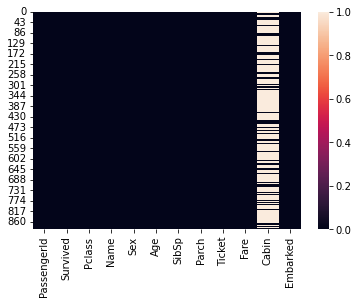

In [171]:
sns.heatmap(train.isnull())

In [172]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [173]:
train.drop(['Sex', 'Embarked', 'Name','Ticket','Cabin'],axis=1,inplace=True)

In [174]:
train= pd.concat([train, sex, embark],axis=1)

In [175]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logmodel =LogisticRegression()

In [180]:
logmodel.fit(x_train,y_train)

d:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
predict=logmodel.predict(x_test)
predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# DECISION TREE

Start by training a single decision tree

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dtree=DecisionTreeClassifier()

In [184]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

# Training & Predicting 


In [185]:
predict_tree=dtree.predict(x_test)

In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       154
           1       0.72      0.67      0.69       114

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [188]:
print(confusion_matrix(y_test,predict_tree))

[[125  29]
 [ 38  76]]


# Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [191]:
rfc_pred=rfc.predict(x_test)

In [192]:
print(confusion_matrix(y_test,rfc_pred))

[[142  12]
 [ 41  73]]


In [193]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.86      0.64      0.73       114

    accuracy                           0.80       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



In [194]:
from sklearn.naive_bayes import GaussianNB

In [195]:
naive_model=GaussianNB()

In [196]:
naive_model.fit(x_train,y_train)

GaussianNB()

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
logmodel =LogisticRegression()

In [199]:
logmodel.fit(x_train,y_train)

d:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [200]:
predictions=logmodel.predict(x_test)

In [201]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [202]:
from sklearn.metrics import classification_report,confusion_matrix

In [203]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       154
           1       0.79      0.62      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268



In [204]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [206]:
train_new=train.copy()

In [207]:
train_new=train_new.astype({'male':int,'Q':int,'S':int})

In [208]:
train_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [209]:
train_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,19.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train,x_test,y_train,y_test=train_test_split(train_new.drop('Survived',axis=1),train_new['Survived'],test_size=0.30,random_state=101)

# KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier


In [213]:
Knmodel= KNeighborsClassifier(n_neighbors=3)

In [214]:
Knmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [215]:
predict=Knmodel.predict(x_test)

In [216]:
confusion_matrix(y_test,predict)

array([[112,  42],
       [ 69,  45]], dtype=int64)

In [217]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       154
           1       0.52      0.39      0.45       114

    accuracy                           0.59       268
   macro avg       0.57      0.56      0.56       268
weighted avg       0.58      0.59      0.57       268



In [218]:
Knmodel= KNeighborsClassifier(n_neighbors=40)

In [219]:
Knmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [220]:
predict=Knmodel.predict(x_test)

In [221]:
confusion_matrix(y_test,predict)

array([[151,   3],
       [ 96,  18]], dtype=int64)

In [222]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       154
           1       0.86      0.16      0.27       114

    accuracy                           0.63       268
   macro avg       0.73      0.57      0.51       268
weighted avg       0.72      0.63      0.55       268



In [223]:
error_rate=[]
#will take some time
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

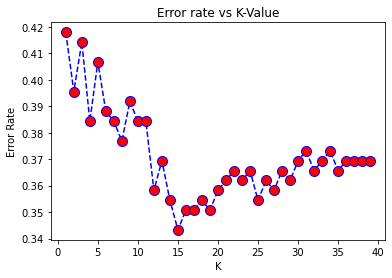

In [224]:
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler= StandardScaler()
scaler.fit(train_new.drop('Survived',axis=1))
scaled_features=scaler.transform(train_new.drop('Survived',axis=1))

In [233]:
scaled_features

array([[-1.73010796,  0.82737724, -0.52119766, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.72622007, -1.56610693,  0.57872934, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [-1.72233219,  0.82737724, -0.24621591, ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 1.72233219,  0.82737724, -0.72743397, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.72622007, -1.56610693, -0.24621591, ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 1.73010796,  0.82737724,  0.16625671, ...,  0.73769513,
         3.25137334, -1.61470971]])

In [237]:
train_new.drop('Survived',axis=1).columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [238]:
train1=pd.DataFrame(scaled_features,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'])

ValueError: Shape of passed values is (891, 9), indices imply (891, 8)

In [239]:
train1

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.827377,-0.521198,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.578729,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.246216,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.372493,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.372493,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.177470,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306
887,-1.566107,-0.727434,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.619306
888,0.827377,-0.727434,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.619306
889,-1.566107,-0.246216,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.614710


In [240]:
 # Standarize the variable 